1. Loading necessry libraries

In [34]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


2. Load the dataset into a DataFrame and inspect its structure using `.head()` and `.info()`.

In [35]:
#Loading Dataset
df = pd.read_csv("ai4i2020.csv")

#Inspecting the structure
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

3. Check for duplicate rows in the dataset. If any exist, remove them.

In [37]:
print(df.duplicated().sum())

0


4. Identify missing values in the dataset and handle them appropriately (e.g., mean imputation or forward fill).

In [38]:
#To find the sum of missing values in wach column
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

5. Perform EDA

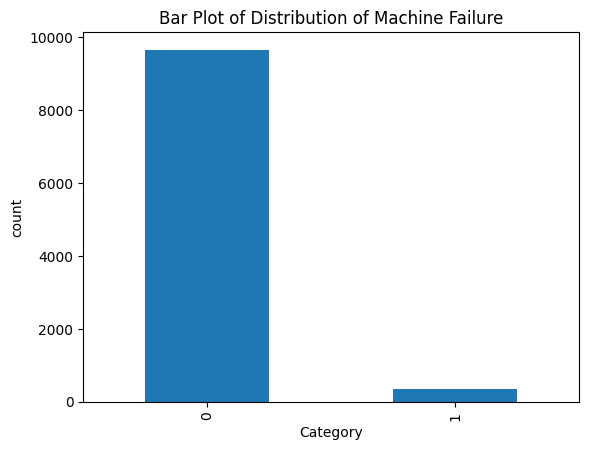

In [39]:
#Plot the distribution of 'Machine Failure' using a bar plot.
df['Machine failure'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Bar Plot of Distribution of Machine Failure')
plt.show()

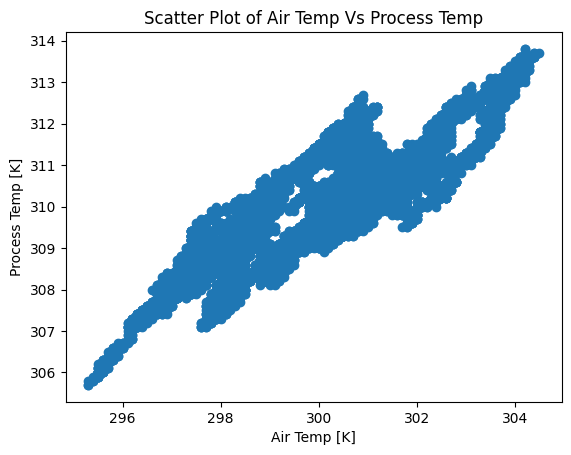

In [40]:
#Visualize the relationship between 'Air Temperature' and 'Process Temperature'. - Create a scatter plot of 'Torque' vs. 'Rotational Speed'.
plt.scatter(df['Air temperature [K]'], df['Process temperature [K]'])
plt.xlabel('Air Temp [K]')
plt.ylabel('Process Temp [K]')
plt.title('Scatter Plot of Air Temp Vs Process Temp')
plt.show() 
#used Scatter plot since both columns are numerical

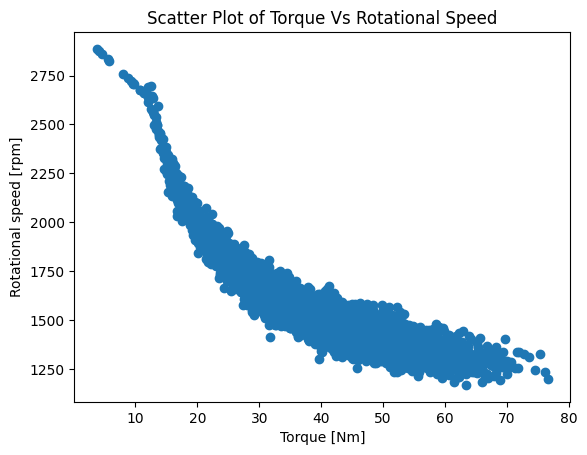

In [41]:
plt.scatter(df['Torque [Nm]'], df['Rotational speed [rpm]'])
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.title('Scatter Plot of Torque Vs Rotational Speed')
plt.show()

6. Perform Statistical Analysis:

In [42]:
#Compute the correlation matrix and visualize it using a heatmap.

new = df.select_dtypes(include=ny.number) #To find only numeric columns
ht = new.corr()
print(ht)

                              UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Machine failure         -0.022892             0.082556   
TWF                      0.009154             0.009955   
HDF                     -0.022215             0.137831   
PWF                     -0.023557             0.003470   
OSF                     -0.000990             0.001988   
RNF                     -0.005954             0.017688   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670   
Process temperatu

<Axes: >

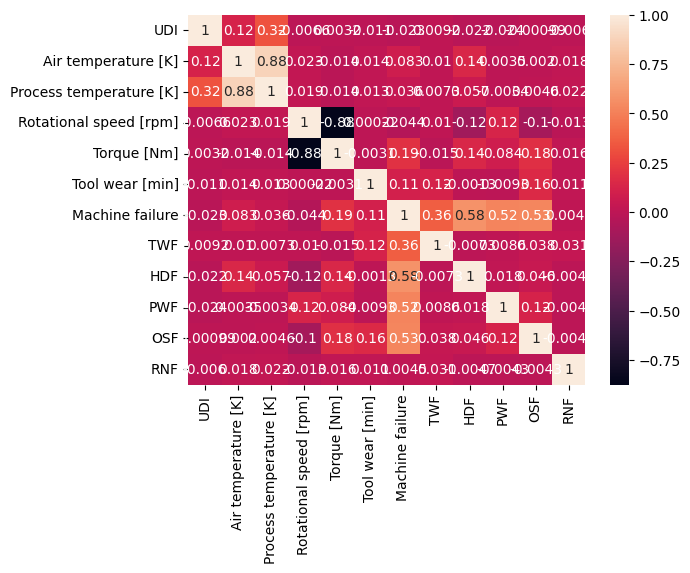

In [43]:
#Heatmap
sns.heatmap(ht, annot=True)

In [44]:
#Analyze summary statistics for numerical columns.
print(df.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

7. Encode categorical variables (e.g., 'Type') into numerical form using one-hot encoding or label encoding.

In [45]:
print(pd.get_dummies(df, columns=["Type", "Air temperature [K]", "Process temperature [K]", "Tool wear [min]", "Machine failure", "TWF", "HDF", "PWF", "OSF", "RNF"]))

        UDI Product ID  Rotational speed [rpm]  Torque [Nm]  Type_H  Type_L  \
0         1     M14860                    1551         42.8   False   False   
1         2     L47181                    1408         46.3   False    True   
2         3     L47182                    1498         49.4   False    True   
3         4     L47183                    1433         39.5   False    True   
4         5     L47184                    1408         40.0   False    True   
...     ...        ...                     ...          ...     ...     ...   
9995   9996     M24855                    1604         29.5   False   False   
9996   9997     H39410                    1632         31.8    True   False   
9997   9998     M24857                    1645         33.4   False   False   
9998   9999     H39412                    1408         48.5    True   False   
9999  10000     M24859                    1500         40.2   False   False   

      Type_M  Air temperature [K]_295.3  Air temper

8. Normalize numerical features (e.g., 'Air Temperature', 'Torque') using MinMaxScaler or StandardScaler.

9. Split the dataset into training and testing sets (80/20 split).